# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Estacio, Damien Marius\
_Student No._: 202113663\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Damien Marius Miana Estacio

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [4]:
!ls drive/My\ Drive

 20210929_204855.jpg
 20211112_091605.jpg
'2021 Undergrad Reply Slip Signed.pdf'
'A3-Pledge of Academic Honesty for Homework1.pdf'
'A-Estacio_Damien Marius_Proof.jpg'
'A-Estacio_Damien Marius_Test.jpg'
'Angles Lines Planes for pdf.pdf'
 AP155
 Bantugan.docx
'Bio2 Cell Cycle.pdf'
'Bio2 Embryonic Devt and Pregnancy.pdf'
 Bio2_Reproductive_structures_hormonal_control_response_1.pdf
 Bio2_Sperm_Egg_and_Fertilization.pdf
 Bio2_Strategies_in_Reproduction_1.pdf
'Bloodborne wallpaper.jpg'
 Chem1.gdraw
 Classroom
'Colab Notebooks'
 CONSENT_ESTACIO_DAMIEN_M.pdf
 Contradiction-Proofs.pdf
'Cover Letter.pdf'
'CRS Grades.pdf'
 E1.3.gdraw
'Employees List.xlsx'
 Estacio_1x1.jpg
'ESTACIO_Attachments Merged.pdf'
'Estacio_Birth Certificate (1).pdf'
'Estacio_Birth Certificate.pdf'
'ESTACIO_DAMIEN MARIUS_APPEAL FOR LATE REGISTRATION (1).pdf'
'ESTACIO_DAMIEN MARIUS_APPEAL FOR LATE REGISTRATION (2).pdf'
'ESTACIO_DAMIEN MARIUS_APPEAL FOR LATE REGISTRATION.pdf'
'Estacio_Damien Marius.jpg'
'Estacio_Damien Mariu

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [5]:
file_path = "/content/drive/My Drive/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [6]:
import numpy as np
import pandas as pd

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [76]:
data_DF = pd.DataFrame(data)
data_DF
# data was turned into DataFrame for ease of operations on columns

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,13.877220,11.936910,11.337210,32.374710,25.266770,25.934250,spiral
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,3.032364,3.348147,3.062732,5.833694,8.061935,7.840197,spiral
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,4.652165,4.031008,3.122812,9.610085,9.280005,6.708179,spiral
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,5.442954,4.227347,3.774427,16.256520,7.738220,7.865478,spiral


#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [77]:
def get_features_targets(data_DF):
  features = data_DF[data_DF.columns[0:10]]
  features["Cu"] = data_DF["petroR50_u"]/data_DF["petroR90_u"]
  features["Cr"] = data_DF["petroR50_r"]/data_DF["petroR90_r"]
  features["Cz"] = data_DF["petroR50_z"]/data_DF["petroR90_z"]
  targets = data_DF[data_DF.columns[16]]
  return features, targets
# Function to split data_DF into features and targets

features, targets = get_features_targets(data_DF)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)
print(data_DF)
print(features)

Features shape: (780, 13)
Targets shape: (780,)
         u-g      g-r      r-i      i-z       ecc      m4_u      m4_g  \
0    1.85765  0.67158  0.42310  0.30610  0.585428  2.251946  2.339849   
1    1.74259  0.86085  0.44927  0.28851  0.749812  2.031566  2.084156   
2    2.10697  0.96710  0.56810  0.33747  0.630089  1.992887  2.450746   
3    1.22840  0.60446  0.39049  0.28913  0.668999  2.056115  2.182252   
4    1.80792  0.78124  0.45528  0.35067  0.500170  2.259167  2.194723   
..       ...      ...      ...      ...       ...       ...       ...   
775  1.34594  0.64285  0.37813  0.23107  0.779956  2.421518  2.248886   
776  1.19482  0.49611  0.31017  0.16244  0.722125  2.211442  2.294102   
777  1.21489  0.57253  0.35423  0.21312  0.793392  2.264709  2.319192   
778  1.41797  0.86460  0.40020  0.35307  0.835901  2.011354  2.023669   
779  1.49346  0.86623  0.43432  0.31509  0.490623  2.387251  2.529668   

         m4_r      m4_i      m4_z  petroR50_u  petroR50_r  petroR50_z  \
0 

<ipython-input-77-434b14b49c2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cu"] = data_DF["petroR50_u"]/data_DF["petroR90_u"]
<ipython-input-77-434b14b49c2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cr"] = data_DF["petroR50_r"]/data_DF["petroR90_r"]
<ipython-input-77-434b14b49c2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

The dataset was split into features and targets. The columns for concentrations could be combined together to lessen the load for the decision tree.

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def predict_class(data):
  features_train, features_test, targets_train, targets_test = train_test_split(features, targets, train_size = 0.8, test_size = 0.2)
  # Splitting of features into training and test
  clf = DecisionTreeClassifier()
  clf = clf.fit(features_train, targets_train)
  targets_predict = pd.DataFrame(clf.predict(features_test))
  # Prediction of targets from test features
  return targets_predict, targets_test

predicted_class, actual_class = predict_class(data)

The function predict_class splits the features into training and test sets. Once the model has been trained, predicted targets can be taken from the test set. These targets classes can be compared to the actual classes.

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

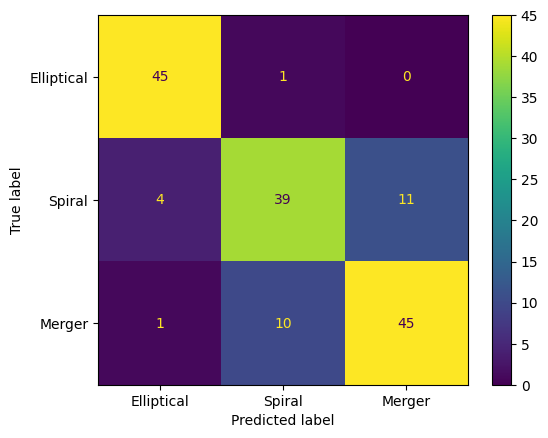

Accuracy is 82.6923076923077%


In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt

cmatrix = metrics.confusion_matrix(actual_class, predicted_class)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmatrix, display_labels = ["Elliptical", "Spiral", "Merger"])
cm_display.plot()
plt.show()
# Creating and plotting of confusion matrix
print("Accuracy is " + str(((cmatrix[0][0] + cmatrix[1][1] + cmatrix[2][2])/np.sum(cmatrix))*100) + "%")
# Percent accuracy

The predicted and actual data is capable of being tabulated in a confusion matrix. It shows which predicted classes are in line with the actual classes. Given that the training set was taken from an 80% split, the resulting accuracy of the decision tree classifier was high.